<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw3__Analysis_of_Words_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

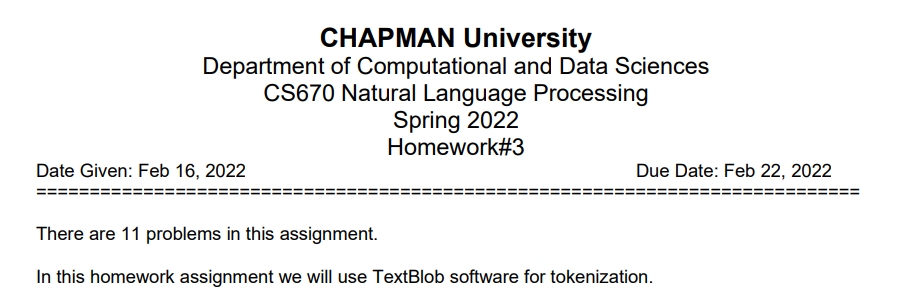

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RomeoJuliet.txt to RomeoJuliet.txt


In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


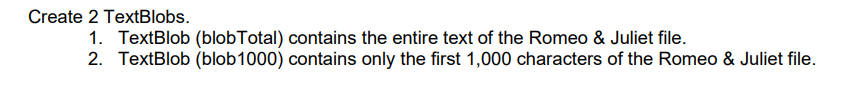

In [ ]:
# Read the Romeo & Juliet text.
textTotal = open('RomeoJuliet.txt').read()
# Retrieve only the first 1,000 characters from the text
blobTotal =TextBlob(textTotal)
blob1000 = TextBlob(textTotal[0:1000])

In [ ]:
# function to print words/sentences
def print_words(list_words,numElementsRow):
  for j in range (0,len(list_words),numElementsRow):
    for i in range(j,j+numElementsRow):
      if (i >= len(list_words)):
        break
      print(i+1, '.', list_words[i], end=', ')
    print()
  print()

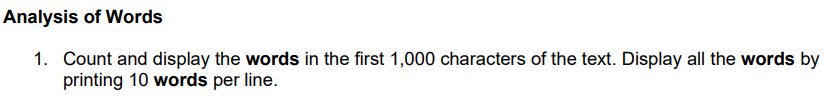

In [ ]:
print("\n", "Count of words =", len(blob1000.words))
nwords = blob1000.words


 Count of words = 167


In [ ]:
print_words(nwords,10)

1 . Project, 2 . Gutenberg, 3 . ’, 4 . s, 5 . Romeo, 6 . and, 7 . Juliet, 8 . by, 9 . William, 10 . Shakespeare, 
11 . This, 12 . eBook, 13 . is, 14 . for, 15 . the, 16 . use, 17 . of, 18 . anyone, 19 . anywhere, 20 . in, 
21 . the, 22 . United, 23 . States, 24 . and, 25 . most, 26 . other, 27 . parts, 28 . of, 29 . the, 30 . world, 
31 . at, 32 . no, 33 . cost, 34 . and, 35 . with, 36 . almost, 37 . no, 38 . restrictions, 39 . whatsoever, 40 . You, 
41 . may, 42 . copy, 43 . it, 44 . give, 45 . it, 46 . away, 47 . or, 48 . re-use, 49 . it, 50 . under, 
51 . the, 52 . terms, 53 . of, 54 . the, 55 . Project, 56 . Gutenberg, 57 . License, 58 . included, 59 . with, 60 . this, 
61 . eBook, 62 . or, 63 . online, 64 . at, 65 . www.gutenberg.org, 66 . If, 67 . you, 68 . are, 69 . not, 70 . located, 
71 . in, 72 . the, 73 . United, 74 . States, 75 . you, 76 . ’, 77 . ll, 78 . have, 79 . to, 80 . check, 
81 . the, 82 . laws, 83 . of, 84 . the, 85 . country, 86 . where, 87 . you, 88 . are, 89 . 

image.png

In [ ]:
print("\n", "Count of words =", len(blobTotal.words))


 Count of words = 30796


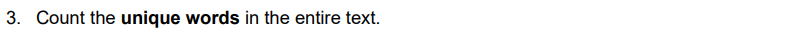

In [ ]:
uniqwords =blobTotal.word_counts.items()
print("The number of Unique words in the text=",len(uniqwords))
print("\n", "Total Number of words in the text=", len(blobTotal.words))

The number of Unique words in the text= 4145

 Total Number of words in the text= 30796


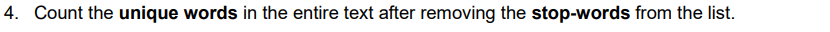

In [ ]:
all_stopwords = stopwords.words('english')
text_tokens = word_tokenize(textTotal)
tokens_without_sw = [word.lower() for word in text_tokens if not word.lower() in all_stopwords]
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
blobFiltered =TextBlob(listToStr)
Fltuniqwords =blobFiltered.word_counts.items()

filtered_stop = [word.lower() for word in text_tokens if word.lower()  in all_stopwords]  
StoplistToStr = ' '.join([str(elem) for elem in filtered_stop]) 
StopblobFiltered =TextBlob(StoplistToStr)

StoplistToStr = ' '.join([str(elem) for elem in filtered_stop]) 
StopblobFiltered =TextBlob(StoplistToStr)
Stopuniqwords =StopblobFiltered.word_counts.items()

print("The number of Unique words in the text=",len(uniqwords))
print("Number of Unique words in the text after removing the Stopwords=",len(Fltuniqwords))
print("Number of Stopwords in the text=",len(Stopuniqwords))

The number of Unique words in the text= 4145
Number of Unique words in the text after removing the Stopwords= 4030
Number of Stopwords in the text= 128


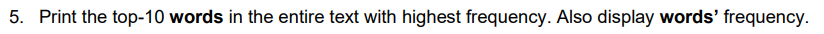

In [ ]:
from operator import itemgetter
sorted_uniq=sorted(list(uniqwords),key=itemgetter(1) ,reverse=True)
TopWords=sorted_uniq[0:10]
df=pd.DataFrame(TopWords,columns=['word','frequency'] )
print(df)

   word  frequency
0   the        876
1     ’        869
2   and        808
3     i        655
4    to        626
5     a        542
6    of        519
7    in        395
8    is        372
9  that        369


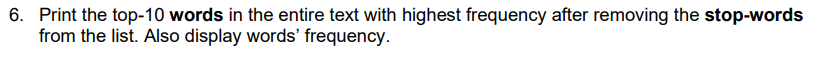

In [ ]:
sorted_uniq_flt=sorted(list(Fltuniqwords),key=itemgetter(1) ,reverse=True)
TopWords2=sorted_uniq_flt[0:10]
df2=pd.DataFrame(TopWords2,columns=['word','frequency'] )
print(df2)

      word  frequency
0        ’        869
1    romeo        320
2     thou        278
3   juliet        195
4      thy        170
5  capulet        163
6    nurse        149
7     love        148
8     thee        138
9     lady        117


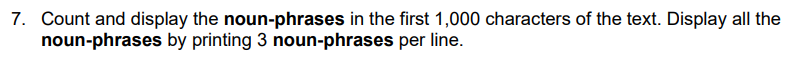

In [ ]:
# Noun Phrases
nouns_1k=list(blob1000.noun_phrases)
print("Noun Phrases in the 1000 char text=",len(blob1000.noun_phrases))
dictionary=blobTotal.np_counts
dictionarypython=dict(dictionary)

rankedlist=sorted(dictionary,key=dictionary.get,reverse=True)
print(type(rankedlist))
#######################################################
test_1=""
for i in range(0, len(blob1000.noun_phrases)):
 test_1+= (str(i)+". "+ blob1000.noun_phrases[i]+","+"_")

test_2=list(test_1.split("_")) #convert string test_1 to test

def print_words(num_words):
   print(*test_2[num_words:num_words+3])

for i in range(0, len(blob1000.noun_phrases),3):
  print_words(i)

print("\n", "Count of words =", len(blob1000.noun_phrases))


Noun Phrases in the 1000 char text= 28
<class 'list'>
0. project gutenberg, 1. ’ s, 2. romeo,
3. juliet, 4. william shakespeare, 5. restrictions whatsoever,
6. project gutenberg license, 7. ’ ll, 8. title,
9. romeo, 10. juliet author, 11. william shakespeare release date,
12. november, 13. etext, 14. updated,
15. january, 16. language, 17. english character,
18. utf-8, 19. start of this project gutenberg ebook romeo and juliet, 20. pg shakespeare team,
21. project gutenberg, 22. the tragedy of romeo and juliet, 23. william shakespeare contents the prologue,
24. act, 25. scene, 26. public place,
27. scene ii, 

 Count of words = 28


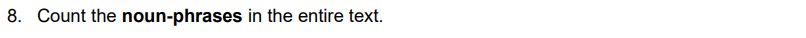

In [ ]:
print("\n", "Count of noun-phrases in the entire text=", len(blobTotal.noun_phrases))


 Count of noun-phrases in the entire text= 5036


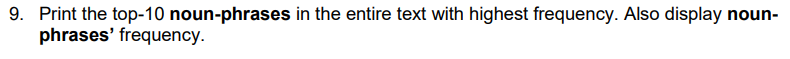

In [ ]:
for i in range (0,10):
  key=rankedlist[i]
  value=dictionary[key]
  print(str(i+1)+'   '+ key.capitalize()+' repeats '+str(value)+' times.')

1   Romeo repeats 297 times.
2   Juliet repeats 177 times.
3   Nurse repeats 132 times.
4   Capulet repeats 106 times.
5   ’ s repeats 98 times.
6   Mercutio repeats 86 times.
7   Tybalt repeats 75 times.
8   Benvolio repeats 72 times.
9   Friar lawrence repeats 69 times.
10   ’ ll repeats 68 times.


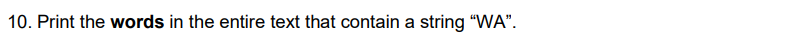

In [ ]:
print ("10. Print the words in the entire text that contain a string “WA” ")
for word in blobTotal.words:
  if 'WA' in word:
    print(word)

10. Print the words in the entire text that contain a string “WA” 
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WARRANTY
WARRANTY
WARRANTIES
WARRANTIES


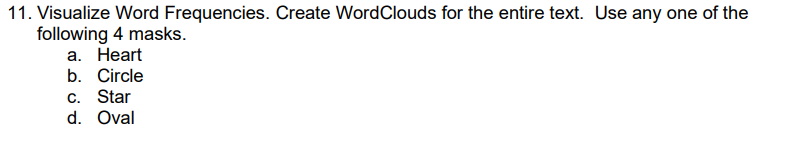

In [ ]:
#wordcloud
from google.colab import files
uploaded = files.upload()

Saving mask_circle.png to mask_circle.png


In [ ]:
import imageio
mask_image=imageio.imread(str('mask_circle.png'))
from wordcloud import WordCloud
wordcloud =WordCloud(colormap='prism',mask=mask_image,background_color='white')
wordcloudImage =wordcloud.generate(textTotal)

print(type(wordcloudImage))
wordcloudFile= wordcloudImage.to_file('Hamlet.png')
wordcloudImage.to_image

<class 'wordcloud.wordcloud.WordCloud'>


<bound method WordCloud.to_image of <wordcloud.wordcloud.WordCloud object at 0x7fa7eae69e50>>

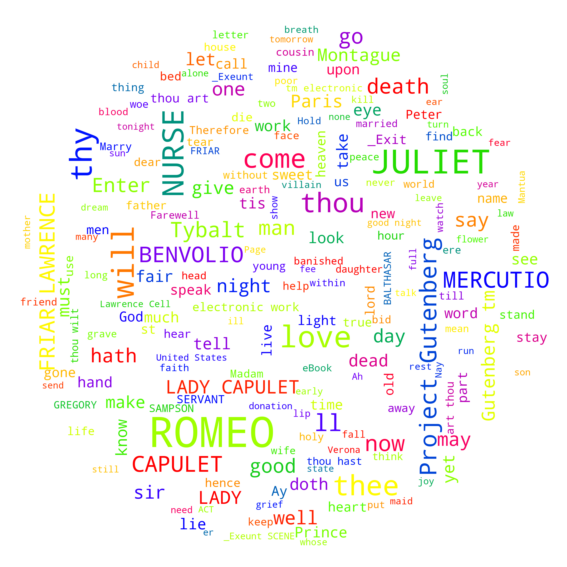

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wordcloudImage, interpolation='bilinear')
plt.axis("off")
plt.show()